# Assignment 2 by: Jordan Pang (s3902159)


In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle

# Task 1: Regression


In [2]:
#import csv without nulls and sample 2000 rows
sample1_df = pd.read_csv("A2data.csv", sep=";").dropna().sample(n=200)
sample1_df.info()
# write to csv
sample1_df.to_csv("s3902159-A2SampleOne.csv", index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 4720 to 2726
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         200 non-null    float64
 1   volatile acidity      200 non-null    float64
 2   citric acid           200 non-null    float64
 3   residual sugar        200 non-null    object 
 4   chlorides             200 non-null    float64
 5   free sulfur dioxide   200 non-null    object 
 6   total sulfur dioxide  200 non-null    object 
 7   density               200 non-null    object 
 8   pH                    200 non-null    float64
 9   sulphates             200 non-null    float64
 10  alcohol               200 non-null    float64
 11  quality               200 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 20.3+ KB


In [3]:
# get alcohol and density
alc_dens_sample1 = sample1_df[["alcohol","density"]]
# convert density to float
alc_dens_sample1.loc[:, 'density'] = alc_dens_sample1['density'].astype(float)
alc_dens_sample1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 4720 to 2726
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  200 non-null    float64
 1   density  200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


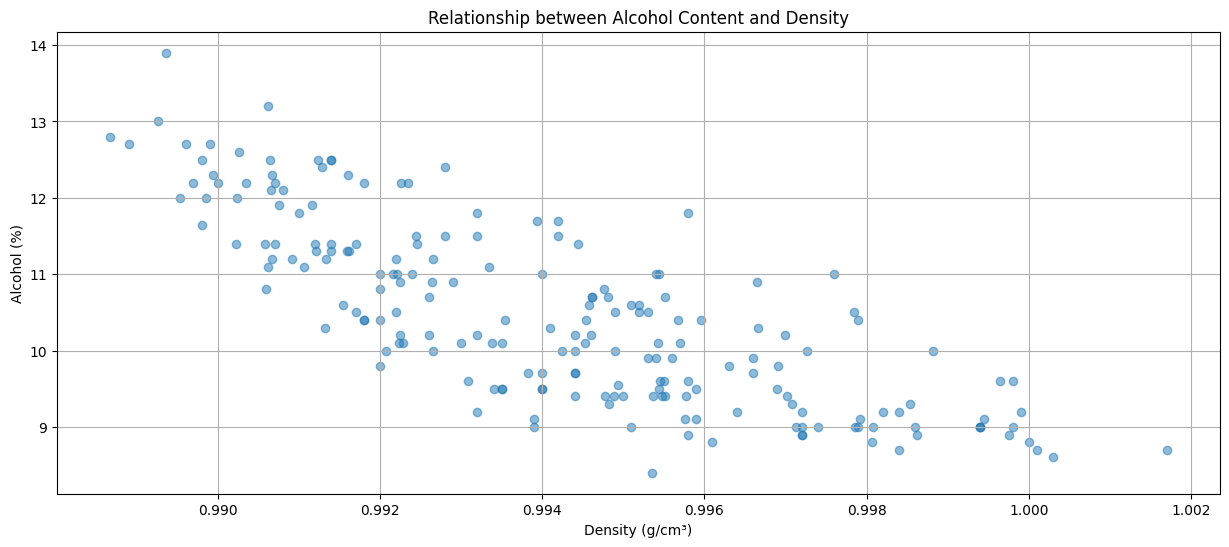

In [4]:
# scatterplot
plt.figure(figsize=(15, 6))
plt.scatter(alc_dens_sample1['density'], alc_dens_sample1['alcohol'], alpha=0.5)
plt.title('Relationship between Alcohol Content and Density')
plt.xlabel('Density (g/cm³)')
plt.ylabel('Alcohol (%)')
plt.grid(True)
plt.show()

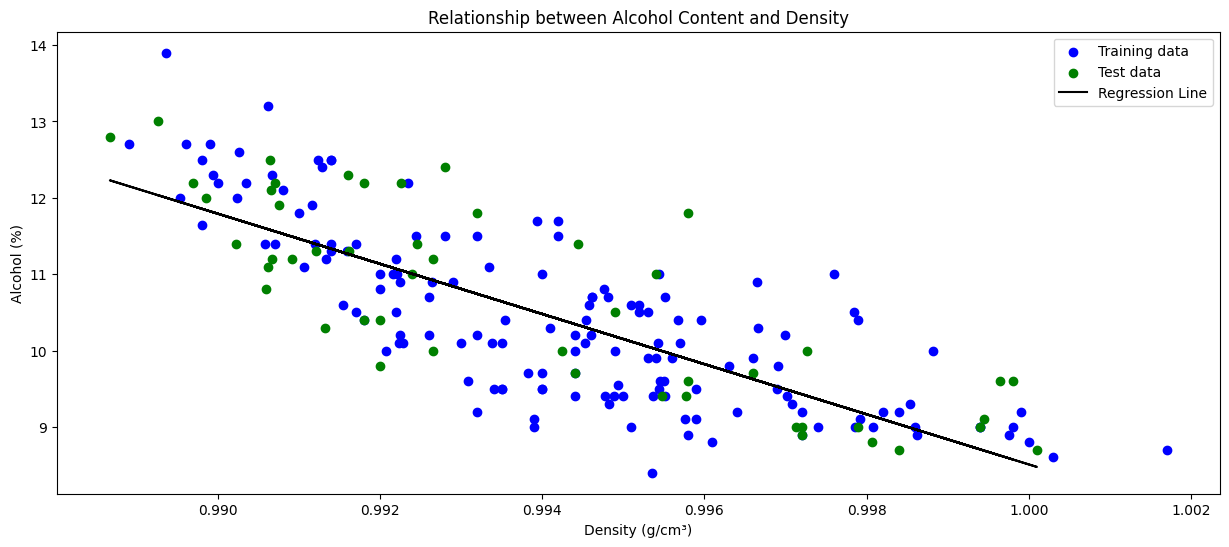

The coefficient of the model is: -328.36359890813895


In [5]:
# create linear regression model
linear_model = LinearRegression()

# prepare axis
X = alc_dens_sample1['density'].values.reshape(-1, 1)
y = alc_dens_sample1['alcohol'].values

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# fit model
linear_model.fit(X_train, y_train)

# predict model
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# plot
plt.figure(figsize=(15, 6))  
plt.scatter(X_train, y_train, color='blue', label='Training data') 
plt.scatter(X_test, y_test, color='green', label='Test data')  
plt.plot(X_test, y_pred_test, color='black', label='Regression Line') 

plt.title('Relationship between Alcohol Content and Density')
plt.xlabel('Density (g/cm³)')
plt.ylabel('Alcohol (%)')
plt.legend()

plt.show()

# get coeff
print(f"The coefficient of the model is: {linear_model.coef_[0]}")

# Task 2: Classification

In [6]:
# import csv without nulls and sample 2000 rows
sample2_df = pd.read_csv("A2data.csv", sep=";").dropna().sample(n=500)
sample2_df.info()
# write to csv
sample2_df.to_csv("s3902159-A2SampleTwo.csv", index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 2658 to 259
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         500 non-null    float64
 1   volatile acidity      500 non-null    float64
 2   citric acid           500 non-null    float64
 3   residual sugar        500 non-null    object 
 4   chlorides             500 non-null    float64
 5   free sulfur dioxide   500 non-null    object 
 6   total sulfur dioxide  500 non-null    object 
 7   density               500 non-null    object 
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 50.8+ KB


In [7]:
# convert to float
for col in ["residual sugar", "free sulfur dioxide", "total sulfur dioxide", "density"]:
    sample2_df[col] = pd.to_numeric(sample2_df[col], errors='coerce')

# prepare feature and target 
X = sample2_df.drop("quality", axis=1)
y = sample2_df["quality"]

## kNN

In [8]:
# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# create knn model
k = 19
knn = KNeighborsClassifier(k)

# fit model
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# print metrics
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 0  0  0  1  0  0]
 [ 0  0  1  1  0  0]
 [ 0  0 14 27  4  0]
 [ 0  0 13 41  3  0]
 [ 0  0  2 11  3  0]
 [ 0  0  1  1  2  0]]
Accuracy: 0.464


## modified kNN 

In [9]:
new_Ind = []
cur_MaxScore = 0.0
col_num = X.shape[1]  
col_Ind_Random = shuffle(range(col_num), random_state=1)
best_Ind = []  

# iterate over features
for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.iloc[:, new_Ind].values 

    # split into training and test
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.25, random_state=1)
    
    # create knn model
    k = 19
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)

    # fit model
    clf.fit(X_train, y_train)
    
    cur_Score = clf.score(X_test, y_test)
    
    # check if current score is better than the max score observed so far
    if cur_Score > cur_MaxScore:
        cur_MaxScore = cur_Score
        # update indices
        best_Ind = new_Ind.copy() 
        # save confusion matrix for best model
        best_conf_matrix = confusion_matrix(y_test, clf.predict(X_test)) 
    elif cur_Score <= cur_MaxScore:
        # remove feature if no improvement
        new_Ind.remove(col_Ind_Random[cur_f])  

print(best_conf_matrix)
print("Accuracy: " + str(cur_MaxScore))
print("Features selected:", X.columns[best_Ind].tolist())  

[[ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0 25 19  1  0]
 [ 0  0 12 37  8  0]
 [ 0  0  2 10  4  0]
 [ 0  0  1  2  1  0]]
Accuracy: 0.528
Features selected: ['citric acid', 'sulphates', 'alcohol', 'pH']


## Decision Tree & comparison

# Task 3: Clustering

## k-Means 

## DBSCAN & comparison 